In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
whitewine=pd.read_csv("winequality-white.csv", header=0, sep=";")

In [3]:
whitewine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
whitewine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [6]:
whitewine.quality.sort_values(ascending=True).unique()

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

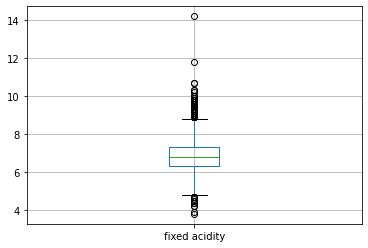

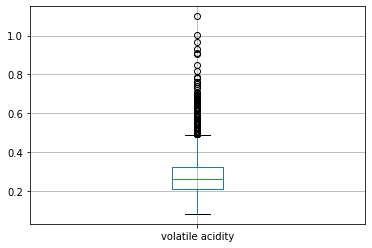

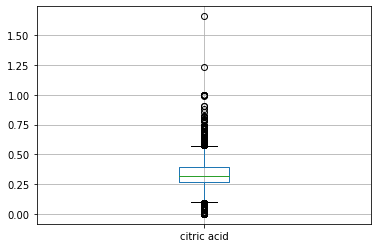

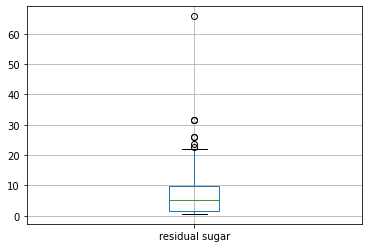

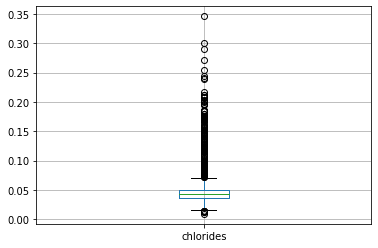

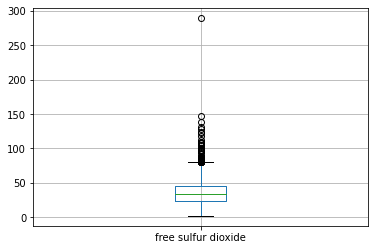

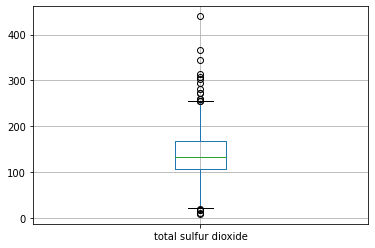

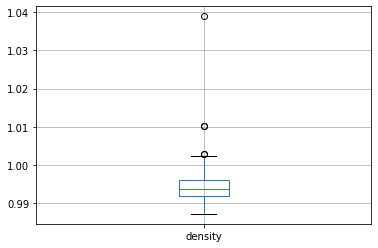

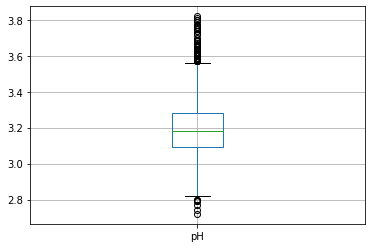

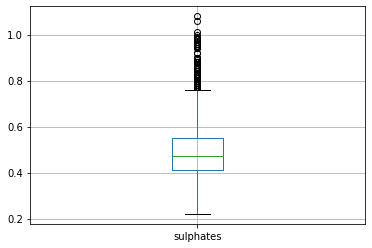

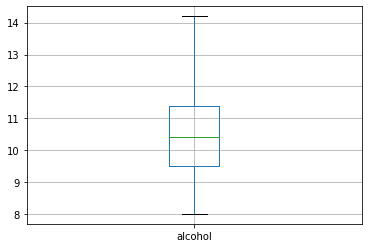

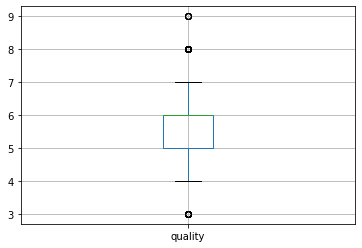

In [7]:
for x in whitewine.columns:
    whitewine.boxplot(column=x)
    plt.show()

In [8]:
whitewine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(4896, 12)
(2, 12)
3.2999999999999985
6
(4898, 12)


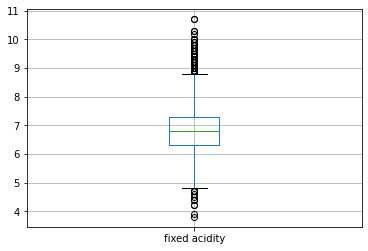

In [9]:
#for value in colname:
q1 = whitewine["fixed acidity"].quantile(0.25)
q3 = whitewine["fixed acidity"].quantile(0.95)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

whitewine_include = whitewine.loc[(whitewine["fixed acidity"] >= low) & \
                                (whitewine["fixed acidity"] <= high)] # meeting the acceptable range
whitewine_exclude = whitewine.loc[(whitewine["fixed acidity"] < low) | (whitewine["fixed acidity"] > high)] #not meeting the acceptable range

print(whitewine_include.shape)
print(whitewine_exclude.shape)

print(low)

fixed_acidity_mean=int(whitewine_include["fixed acidity"].mean()) #finding the mean of the acceptable range
print(fixed_acidity_mean)

#imputing outlier values with mean value
whitewine_exclude["fixed acidity"]=fixed_acidity_mean

#getting back the original shape of df
whitewine1=pd.concat([whitewine_include, whitewine_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(whitewine1.shape)

whitewine1.boxplot(column="fixed acidity")
plt.show()

(4839, 12)
(59, 12)
0.04999999999999999
0
(4898, 12)


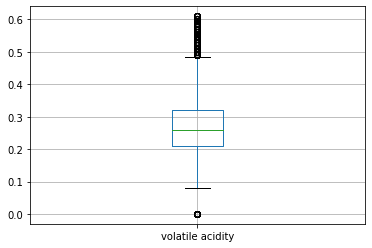

In [10]:
#for value in colname:
q1 = whitewine1["volatile acidity"].quantile(0.50)
q3 = whitewine1["volatile acidity"].quantile(0.90)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

whitewine1_include = whitewine1.loc[(whitewine1["volatile acidity"] >= low) & \
                                (whitewine1["volatile acidity"] <= high)] # meeting the acceptable range
whitewine1_exclude = whitewine1.loc[(whitewine1["volatile acidity"] < low) | (whitewine1["volatile acidity"] > high)] #not meeting the acceptable range

print(whitewine1_include.shape)
print(whitewine1_exclude.shape)

print(low)

volatile_acidity_mean=int(whitewine1_include["volatile acidity"].mean()) #finding the mean of the acceptable range
print(volatile_acidity_mean)

#imputing outlier values with mean value
whitewine1_exclude["volatile acidity"]=volatile_acidity_mean

#getting back the original shape of df
whitewine2=pd.concat([whitewine1_include, whitewine1_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(whitewine2.shape)

whitewine2.boxplot(column="volatile acidity")
plt.show()

(4850, 12)
(48, 12)
0.014999999999999958
0
(4898, 12)


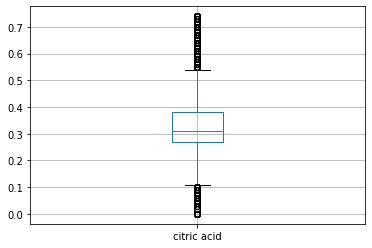

In [11]:
#for value in colname:
q1 = whitewine2["citric acid"].quantile(0.40)
q3 = whitewine2["citric acid"].quantile(0.90)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

whitewine2_include = whitewine2.loc[(whitewine2["citric acid"] >= low) & \
                                (whitewine2["citric acid"] <= high)] # meeting the acceptable range
whitewine2_exclude = whitewine2.loc[(whitewine2["citric acid"] < low) | (whitewine2["citric acid"] > high)] #not meeting the acceptable range

print(whitewine2_include.shape)
print(whitewine2_exclude.shape)

print(low)

citric_acid_mean=int(whitewine2_include["citric acid"].mean()) #finding the mean of the acceptable range
print(citric_acid_mean)

#imputing outlier values with mean value
whitewine2_exclude["citric acid"]=volatile_acidity_mean

#getting back the original shape of df
whitewine3=pd.concat([whitewine2_include, whitewine2_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(whitewine3.shape)

whitewine3.boxplot(column="citric acid")
plt.show()

(4893, 12)
(5, 12)
-12.55
6
(4898, 12)


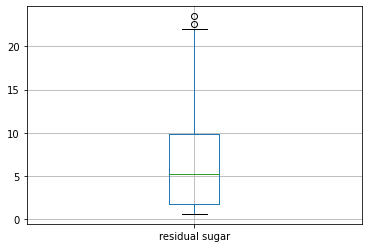

In [12]:
#for value in colname:
q1 = whitewine3["residual sugar"].quantile(0.25)
q3 = whitewine3["residual sugar"].quantile(0.80)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

whitewine3_include = whitewine3.loc[(whitewine3["residual sugar"] >= low) & \
                                (whitewine3["residual sugar"] <= high)] # meeting the acceptable range
whitewine3_exclude = whitewine3.loc[(whitewine3["residual sugar"] < low) | (whitewine3["residual sugar"] > high)] #not meeting the acceptable range

print(whitewine3_include.shape)
print(whitewine3_exclude.shape)

print(low)

residual_sugar_mean=int(whitewine3_include["residual sugar"].mean()) #finding the mean of the acceptable range
print(residual_sugar_mean)

#imputing outlier values with mean value
whitewine3_exclude["residual sugar"]=residual_sugar_mean

#getting back the original shape of df
whitewine4=pd.concat([whitewine3_include, whitewine3_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(whitewine4.shape)

whitewine4.boxplot(column="residual sugar")
plt.show()

(4820, 12)
(78, 12)
-0.046
0
(4898, 12)


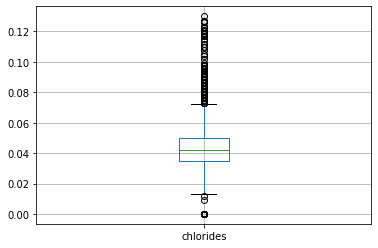

In [13]:
#for value in colname:
q1 = whitewine4["chlorides"].quantile(0.01)
q3 = whitewine4["chlorides"].quantile(0.94)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

whitewine4_include = whitewine4.loc[(whitewine4["chlorides"] >= low) & \
                                (whitewine4["chlorides"] <= high)] # meeting the acceptable range
whitewine4_exclude = whitewine4.loc[(whitewine4["chlorides"] < low) | (whitewine4["chlorides"] > high)] #not meeting the acceptable range

print(whitewine4_include.shape)
print(whitewine4_exclude.shape)

print(low)

chlorides_mean=int(whitewine4_include["chlorides"].mean()) #finding the mean of the acceptable range
print(chlorides_mean)

#imputing outlier values with mean value
whitewine4_exclude["chlorides"]=chlorides_mean

#getting back the original shape of df
whitewine5=pd.concat([whitewine4_include, whitewine4_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(whitewine5.shape)

whitewine5.boxplot(column="chlorides")
plt.show()

(4897, 12)
(1, 12)
-55.5
35
(4898, 12)


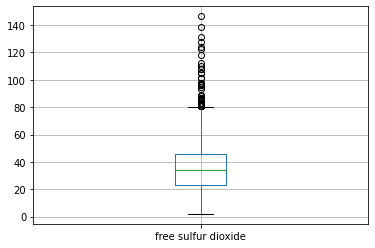

In [14]:
#for value in colname:
q1 = whitewine5["free sulfur dioxide"].quantile(0.20)
q3 = whitewine5["free sulfur dioxide"].quantile(0.98)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

whitewine5_include = whitewine5.loc[(whitewine5["free sulfur dioxide"] >= low) & \
                                (whitewine5["free sulfur dioxide"] <= high)] # meeting the acceptable range
whitewine5_exclude = whitewine5.loc[(whitewine5["free sulfur dioxide"] < low) | (whitewine5["free sulfur dioxide"] > high)] #not meeting the acceptable range

print(whitewine5_include.shape)
print(whitewine5_exclude.shape)

print(low)

free_sulfur_dioxide_mean=int(whitewine5_include["free sulfur dioxide"].mean()) #finding the mean of the acceptable range
print(free_sulfur_dioxide_mean)

#imputing outlier values with mean value
whitewine5_exclude["free sulfur dioxide"]=free_sulfur_dioxide_mean

#getting back the original shape of df
whitewine_rev=pd.concat([whitewine5_include, whitewine5_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(whitewine_rev.shape)

whitewine_rev.boxplot(column="free sulfur dioxide")
plt.show()

In [15]:
whitewine_rev.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [16]:
whitewine_rev.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [17]:
whitewine_rev.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

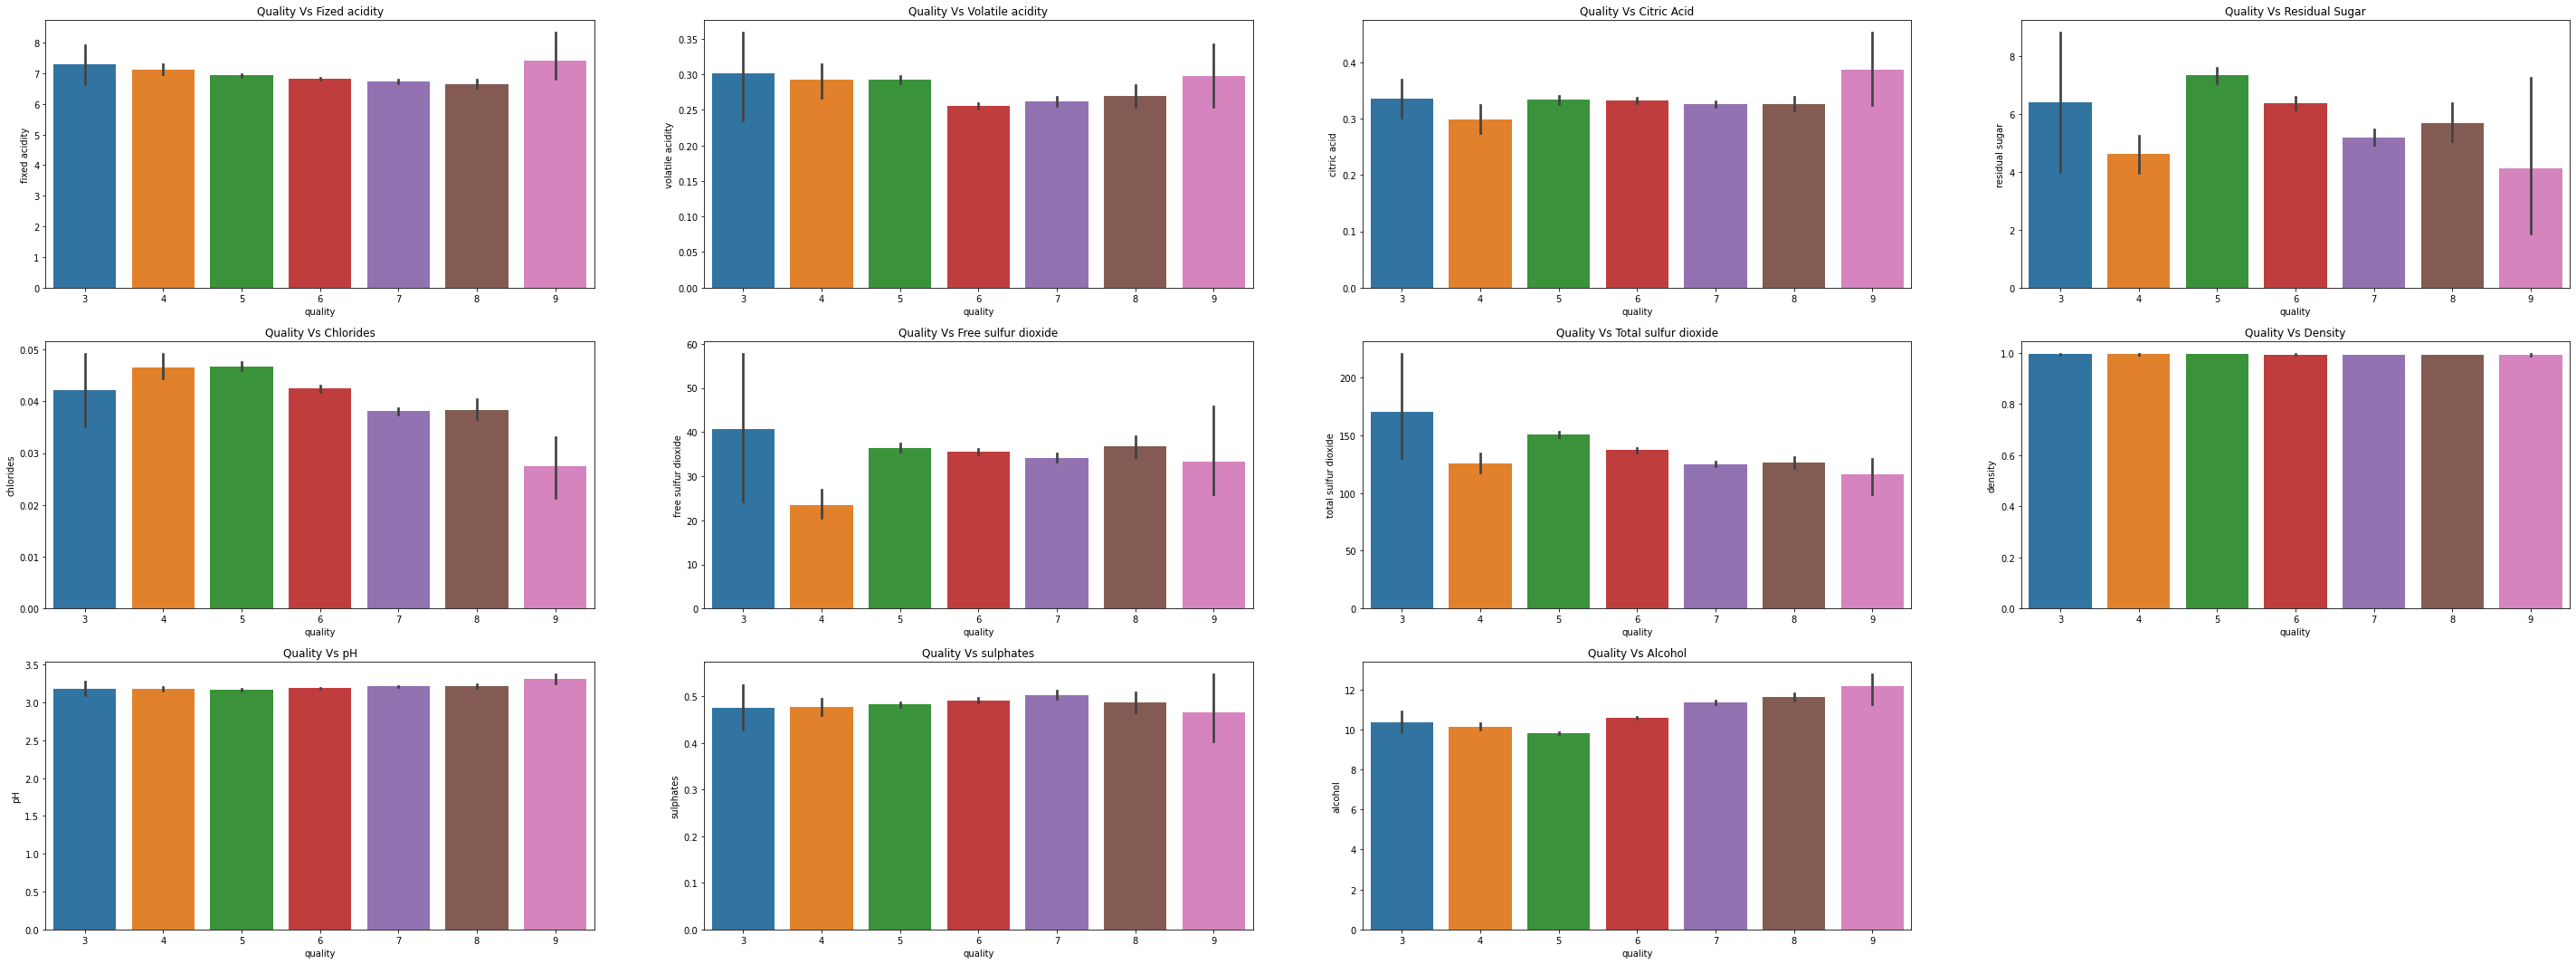

In [18]:
plt.figure(figsize=(50,25))
plt.subplot(4,4,1)
plt.title("Quality Vs Fized acidity")
sns.barplot(data=whitewine_rev, x="quality", y="fixed acidity")

plt.subplot(4,4,2)
plt.title("Quality Vs Volatile acidity")
sns.barplot(data=whitewine_rev, x="quality", y="volatile acidity")

plt.subplot(4,4,3)
plt.title("Quality Vs Citric Acid")
sns.barplot(data=whitewine_rev, x="quality", y="citric acid")

plt.subplot(4,4,4)
plt.title("Quality Vs Residual Sugar")
sns.barplot(data=whitewine_rev, x="quality", y="residual sugar")

plt.subplot(4,4,5)
plt.title("Quality Vs Chlorides")
sns.barplot(data=whitewine_rev, x="quality", y="chlorides")

plt.subplot(4,4,6)
plt.title("Quality Vs Free sulfur dioxide")
sns.barplot(data=whitewine_rev, x="quality", y="free sulfur dioxide")

plt.subplot(4,4,7)
plt.title("Quality Vs Total sulfur dioxide")
sns.barplot(data=whitewine_rev, x="quality", y="total sulfur dioxide")

plt.subplot(4,4,8)
plt.title("Quality Vs Density")
sns.barplot(data=whitewine_rev, x="quality", y="density")

plt.subplot(4,4,9)
plt.title("Quality Vs pH")
sns.barplot(data=whitewine_rev, x="quality", y="pH")

plt.subplot(4,4,10)
plt.title("Quality Vs sulphates")
sns.barplot(data=whitewine_rev, x="quality", y="sulphates")

plt.subplot(4,4,11)
plt.title("Quality Vs Alcohol")
sns.barplot(data=whitewine_rev, x="quality", y="alcohol")
plt.show()

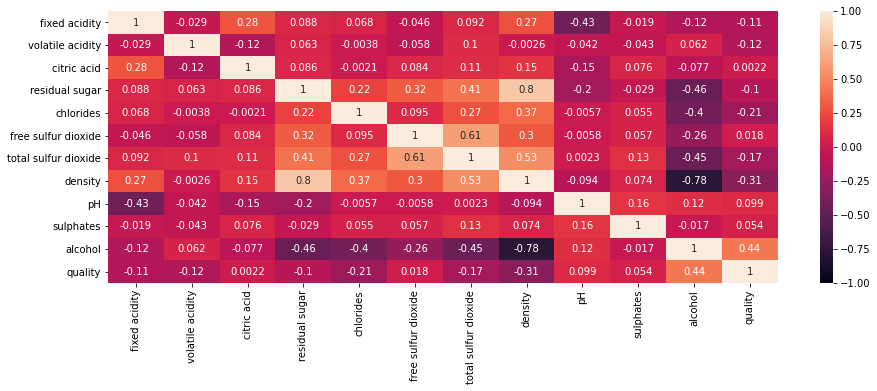

In [19]:
plt.figure(figsize=(15,5))
corr_df=whitewine_rev.corr(method="pearson")
sns.heatmap(corr_df,vmax=1,vmin=-1.0,annot=True);

In [20]:
whitewine_rev.quality=whitewine_rev.quality.replace({3:"bad", 4:"bad", 5:"bad", 6:"good", 7:"good", 8:"good", 9:"good"})

In [21]:
whitewine_rev.quality.value_counts()

good    3258
bad     1640
Name: quality, dtype: int64

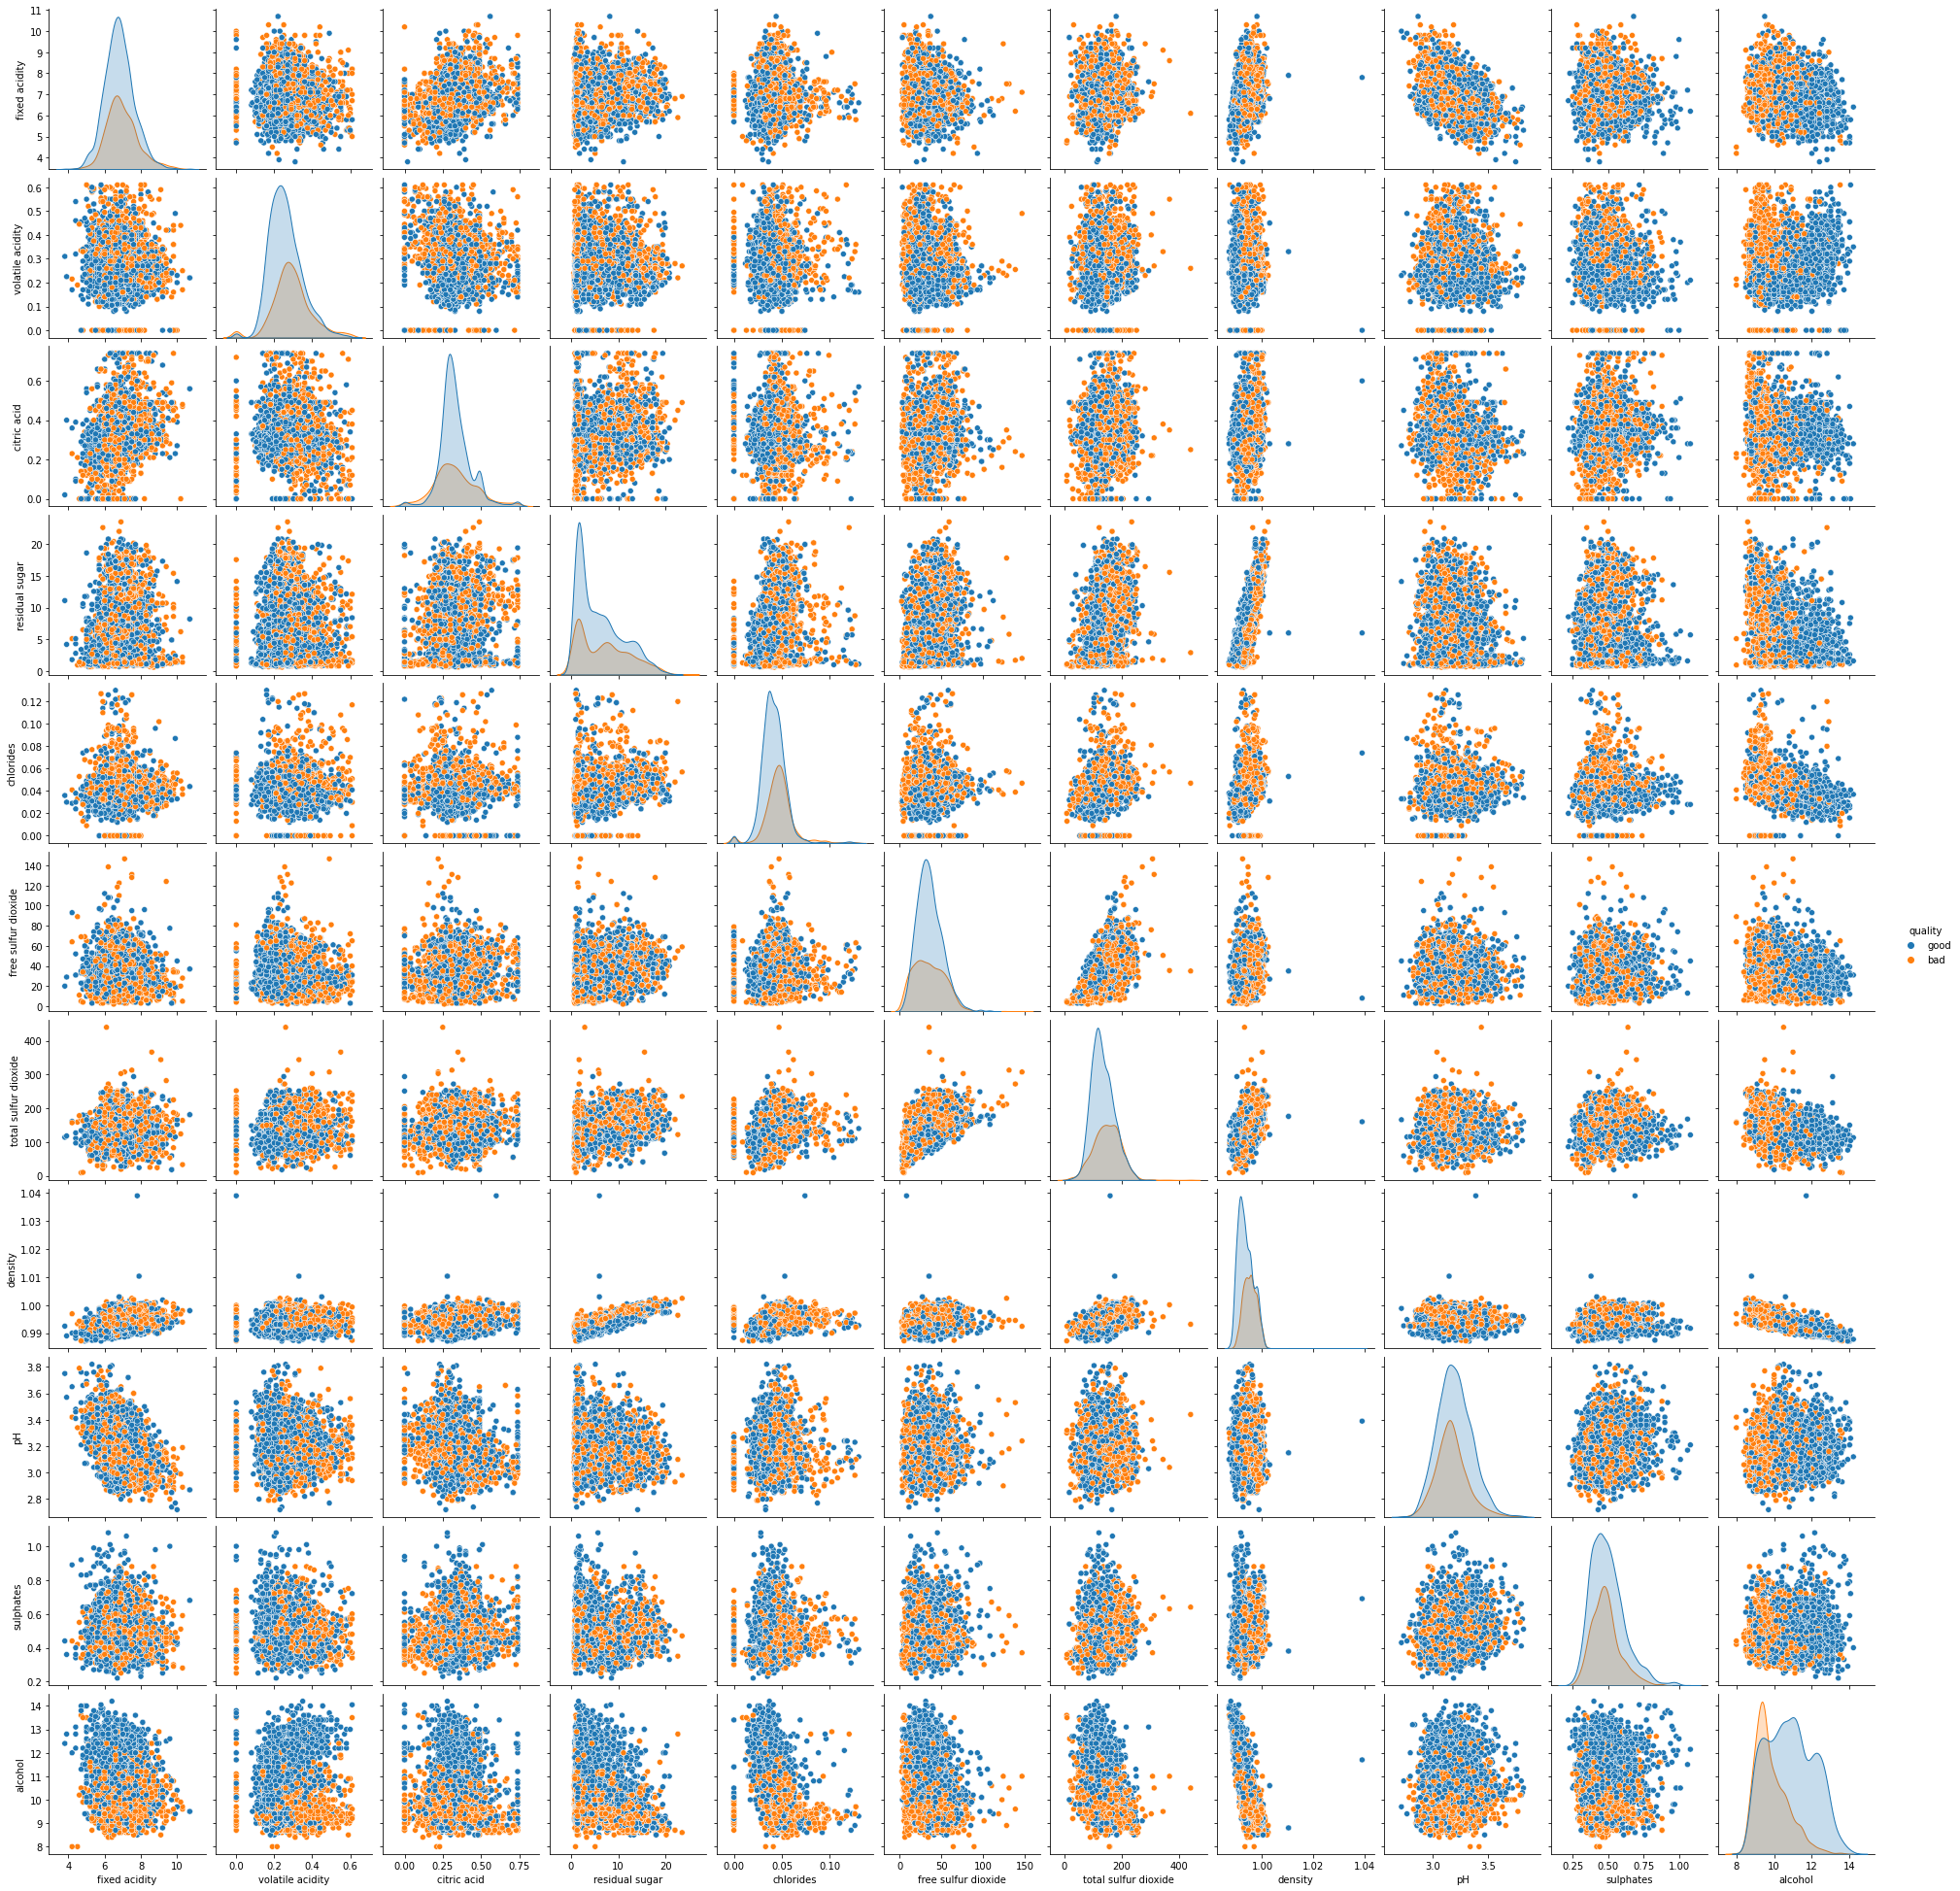

In [22]:
sns.pairplot(data=whitewine_rev, hue="quality")

In [23]:
le=LabelEncoder()

whitewine_rev["quality"]=le.fit_transform(whitewine_rev["quality"])

In [24]:
le_name_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature',"quality")
print('le_name_mapping', le_name_mapping)

Feature quality
le_name_mapping {'bad': 0, 'good': 1}


In [25]:
whitewine_rev.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        1  
1      9.5        1  
2     10.1        1  
3      9.9        1  
4      9.9        1

In [26]:
X= whitewine_rev.iloc[:,:-1]
Y= whitewine_rev["quality"]
print(X.shape, Y.shape)

(4898, 11) (4898,)


In [27]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3428, 11) (3428,) (1470, 11) (1470,)


In [28]:
scaler= StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 1.77454183e-01  2.81540415e-03  2.59345838e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.61455725e-01  3.24757417e-01  8.64250764e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.49574118e+00  1.10129408e-01  6.05187361e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [ 4.17142728e-01 -4.26440613e-01 -2.85322787e+00 ... -1.71054293e+00
  -6.12078835e-01 -1.06808001e+00]
 [ 2.97298455e-01  7.54013434e-01 -2.85322787e+00 ... -1.77677459e+00
   8.89733725e-02 -9.86811901e-01]
 [-9.01144270e-01 -1.04498600e-01 -6.91718350e-01 ...  1.66727194e+00
   1.31581474e+00 -1.15945603e-02]]


#### Logistic Regression

In [29]:
model_log= LogisticRegression()
model_log.fit(X_train, Y_train)
LR=model_log.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, LR),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, LR),"\n")
print("Classification report\n", classification_report(Y_test, LR),"\n")

Accuracy score:
 0.7414965986394558 

Confusion matix:
 [[230 269]
 [111 860]] 

Classification report
               precision    recall  f1-score   support

           0       0.67      0.46      0.55       499
           1       0.76      0.89      0.82       971

    accuracy                           0.74      1470
   macro avg       0.72      0.67      0.68      1470
weighted avg       0.73      0.74      0.73      1470
 



#### SGDClassifier

In [30]:
model_sgd= SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, 
                        n_iter_no_change=3)
model_sgd.fit(X_train, Y_train)
SGD= model_sgd.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SGD),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD),"\n")
print("Classification report\n", classification_report(Y_test, SGD),"\n")

Accuracy score:
 0.6741496598639456 

Confusion matix:
 [[121 378]
 [101 870]] 

Classification report
               precision    recall  f1-score   support

           0       0.55      0.24      0.34       499
           1       0.70      0.90      0.78       971

    accuracy                           0.67      1470
   macro avg       0.62      0.57      0.56      1470
weighted avg       0.65      0.67      0.63      1470
 



#### Tune SGDClassifier

In [31]:
model_sgd_tune= SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, 
                        n_iter_no_change=13)
model_sgd_tune.fit(X_train, Y_train)
SGD_tune= model_sgd_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SGD_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD_tune),"\n")
print("Classification report\n", classification_report(Y_test, SGD_tune),"\n")

Accuracy score:
 0.6605442176870748 

Confusion matix:
 [[  0 499]
 [  0 971]] 

Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       499
           1       0.66      1.00      0.80       971

    accuracy                           0.66      1470
   macro avg       0.33      0.50      0.40      1470
weighted avg       0.44      0.66      0.53      1470
 



#### KNN

In [32]:
model_KNN= KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="euclidean")
model_KNN.fit(X_train, Y_train)
KNN= model_KNN.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN),"\n")
print("Classification report\n", classification_report(Y_test, KNN),"\n")

Accuracy score:
 0.6782312925170068 

Confusion matix:
 [[134 365]
 [108 863]] 

Classification report
               precision    recall  f1-score   support

           0       0.55      0.27      0.36       499
           1       0.70      0.89      0.78       971

    accuracy                           0.68      1470
   macro avg       0.63      0.58      0.57      1470
weighted avg       0.65      0.68      0.64      1470
 



In [33]:
int(np.sqrt(len(X_train)))

58

#### Tune KNN

In [34]:
model_KNN_tune= KNeighborsClassifier(n_neighbors=11, metric="euclidean")
model_KNN_tune.fit(X_train, Y_train)
KNN_tune= model_KNN_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN_tune),"\n")
print("Classification report\n", classification_report(Y_test, KNN_tune),"\n")

Accuracy score:
 0.7013605442176871 

Confusion matix:
 [[201 298]
 [141 830]] 

Classification report
               precision    recall  f1-score   support

           0       0.59      0.40      0.48       499
           1       0.74      0.85      0.79       971

    accuracy                           0.70      1470
   macro avg       0.66      0.63      0.63      1470
weighted avg       0.69      0.70      0.68      1470
 



#### SVC

In [35]:
model_svm= SVC(kernel='rbf', C=1, gamma=0.01)
model_svm.fit(X_train, Y_train)
SVM= model_svm.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM),"\n")
print("Classification report\n", classification_report(Y_test, SVM),"\n")

Accuracy score:
 0.7136054421768707 

Confusion matix:
 [[182 317]
 [104 867]] 

Classification report
               precision    recall  f1-score   support

           0       0.64      0.36      0.46       499
           1       0.73      0.89      0.80       971

    accuracy                           0.71      1470
   macro avg       0.68      0.63      0.63      1470
weighted avg       0.70      0.71      0.69      1470
 



#### Tune SVC

In [36]:
model_svm_tune= SVC(kernel='rbf', C=1100, gamma=0.001)
model_svm_tune.fit(X_train, Y_train)
SVM_tune= model_svm_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM_tune),"\n")
print("Classification report\n", classification_report(Y_test, SVM_tune),"\n")

Accuracy score:
 0.753061224489796 

Confusion matix:
 [[275 224]
 [139 832]] 

Classification report
               precision    recall  f1-score   support

           0       0.66      0.55      0.60       499
           1       0.79      0.86      0.82       971

    accuracy                           0.75      1470
   macro avg       0.73      0.70      0.71      1470
weighted avg       0.75      0.75      0.75      1470
 



#### DecisionTree Classifier

In [37]:
model_DT= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
model_DT.fit(X_train, Y_train)
DT= model_DT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, DT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT),"\n")
print("Classification report\n", classification_report(Y_test, DT),"\n")

Accuracy score:
 0.7782312925170068 

Confusion matix:
 [[316 183]
 [143 828]] 

Classification report
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       499
           1       0.82      0.85      0.84       971

    accuracy                           0.78      1470
   macro avg       0.75      0.74      0.75      1470
weighted avg       0.77      0.78      0.78      1470
 



#### Tune DecisionTree Classifier

In [38]:
model_DT_tune= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10, min_samples_leaf=1, 
                                      min_samples_split=5, max_depth=10)
model_DT_tune.fit(X_train, Y_train)
DT_tune= model_DT_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, DT_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT_tune),"\n")
print("Classification report\n", classification_report(Y_test, DT_tune),"\n")

Accuracy score:
 0.7741496598639456 

Confusion matix:
 [[312 187]
 [145 826]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       499
           1       0.82      0.85      0.83       971

    accuracy                           0.77      1470
   macro avg       0.75      0.74      0.74      1470
weighted avg       0.77      0.77      0.77      1470
 



#### ExtraTrees Classifier

In [39]:
model_EXT= ExtraTreesClassifier(n_estimators=100, random_state=10)
model_EXT.fit(X_train,Y_train)
EXT= model_EXT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.8340136054421768 

Confusion matix:
 [[330 169]
 [ 75 896]] 

Classification report
               precision    recall  f1-score   support

           0       0.81      0.66      0.73       499
           1       0.84      0.92      0.88       971

    accuracy                           0.83      1470
   macro avg       0.83      0.79      0.81      1470
weighted avg       0.83      0.83      0.83      1470
 



#### Tune ExtraTrees Classifier

In [40]:
model_EXT_tune= ExtraTreesClassifier(n_estimators=140, random_state=10)
model_EXT_tune.fit(X_train,Y_train)
EXT= model_EXT_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.8353741496598639 

Confusion matix:
 [[332 167]
 [ 75 896]] 

Classification report
               precision    recall  f1-score   support

           0       0.82      0.67      0.73       499
           1       0.84      0.92      0.88       971

    accuracy                           0.84      1470
   macro avg       0.83      0.79      0.81      1470
weighted avg       0.83      0.84      0.83      1470
 



#### RandomForest Classifier

In [41]:
model_RF= RandomForestClassifier(n_estimators=100, random_state=10)
model_RF.fit(X_train,Y_train)
RF= model_RF.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF),"\n")
print("Classification report\n", classification_report(Y_test, RF),"\n")

Accuracy score:
 0.8299319727891157 

Confusion matix:
 [[334 165]
 [ 85 886]] 

Classification report
               precision    recall  f1-score   support

           0       0.80      0.67      0.73       499
           1       0.84      0.91      0.88       971

    accuracy                           0.83      1470
   macro avg       0.82      0.79      0.80      1470
weighted avg       0.83      0.83      0.83      1470
 



#### Tune RandomForest Classifier

In [53]:
model_RF_tune= RandomForestClassifier(n_estimators=1500, random_state=10)
model_RF_tune.fit(X_train,Y_train)
RF_tune= model_RF_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF_tune),"\n")
print("Classification report\n", classification_report(Y_test, RF_tune),"\n")

Accuracy score:
 0.8367346938775511 

Confusion matix:
 [[333 166]
 [ 74 897]] 

Classification report
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       499
           1       0.84      0.92      0.88       971

    accuracy                           0.84      1470
   macro avg       0.83      0.80      0.81      1470
weighted avg       0.84      0.84      0.83      1470
 



#### AdaBoost Classifier

In [43]:
model_AB= AdaBoostClassifier(n_estimators=100, random_state=10)
model_AB.fit(X_train,Y_train)
AB= model_AB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, AB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB),"\n")
print("Classification report\n", classification_report(Y_test, AB),"\n")

Accuracy score:
 0.7700680272108843 

Confusion matix:
 [[301 198]
 [140 831]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       499
           1       0.81      0.86      0.83       971

    accuracy                           0.77      1470
   macro avg       0.75      0.73      0.74      1470
weighted avg       0.77      0.77      0.77      1470
 



#### Tune AdaBoost Classifier

In [44]:
model_AB_tune= AdaBoostClassifier(n_estimators=1500, random_state=10)
model_AB_tune.fit(X_train,Y_train)
AB_tune= model_AB_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, AB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB_tune),"\n")
print("Classification report\n", classification_report(Y_test, AB_tune),"\n")

Accuracy score:
 0.7680272108843538 

Confusion matix:
 [[293 206]
 [135 836]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.59      0.63       499
           1       0.80      0.86      0.83       971

    accuracy                           0.77      1470
   macro avg       0.74      0.72      0.73      1470
weighted avg       0.76      0.77      0.76      1470
 



#### GradientBoosting Classifier

In [45]:
model_GB= GradientBoostingClassifier(n_estimators=100, random_state=10)
model_GB.fit(X_train,Y_train)
GB= model_GB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB),"\n")
print("Classification report\n", classification_report(Y_test, GB),"\n")

Accuracy score:
 0.7755102040816326 

Confusion matix:
 [[298 201]
 [129 842]] 

Classification report
               precision    recall  f1-score   support

           0       0.70      0.60      0.64       499
           1       0.81      0.87      0.84       971

    accuracy                           0.78      1470
   macro avg       0.75      0.73      0.74      1470
weighted avg       0.77      0.78      0.77      1470
 



#### Tune GradientBoosting Classifier

In [46]:
model_GB_tune= GradientBoostingClassifier(n_estimators=1201, random_state=10)
model_GB_tune.fit(X_train,Y_train)
GB_tune= model_GB_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB_tune),"\n")
print("Classification report\n", classification_report(Y_test, GB_tune),"\n")

Accuracy score:
 0.8074829931972789 

Confusion matix:
 [[324 175]
 [108 863]] 

Classification report
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       499
           1       0.83      0.89      0.86       971

    accuracy                           0.81      1470
   macro avg       0.79      0.77      0.78      1470
weighted avg       0.80      0.81      0.80      1470
 



#### XGB Classifier

In [47]:
model_XGB= XGBClassifier(n_estimators=100,random_state=10)
model_XGB.fit(X_train,Y_train)
XGB=model_XGB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, XGB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB),"\n")
print("Classification report\n", classification_report(Y_test, XGB),"\n")

[18:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score:
 0.8129251700680272 

Confusion matix:
 [[324 175]
 [100 871]] 

Classification report
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       499
           1       0.83      0.90      0.86       971

    accuracy                           0.81      1470
   macro avg       0.80      0.77      0.78      1470
weighted avg       0.81      0.81      0.81      1470
 



#### Tune XGB Classifier

In [48]:
model_XGB_tune= XGBClassifier(n_estimators=379,random_state=10)
model_XGB_tune.fit(X_train,Y_train)
XGB_tune=model_XGB_tune.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, XGB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB_tune),"\n")
print("Classification report\n", classification_report(Y_test, XGB_tune),"\n")

[18:46:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.8210884353741497 

Confusion matix:
 [[337 162]
 [101 870]] 

Classification report
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       499
           1       0.84      0.90      0.87       971

    accuracy                           0.82      1470
   macro avg       0.81      0.79      0.79      1470
weighted avg       0.82      0.82      0.82      1470
 



#### Ensemble modelling

In [49]:
estimators = []

# model1 = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
# estimators.append(('KNN', model1))
                  
# model2 = SVC(kernel='rbf', C=1100, gamma=0.001)
# estimators.append(('SVC', model2))

model3 = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
estimators.append(('DT', model3))

model4 = ExtraTreesClassifier(n_estimators=140, random_state=10)
estimators.append(('EXT', model4))

model5 = RandomForestClassifier(n_estimators=1500, random_state=10)
estimators.append(('RT', model5))

# model6 = AdaBoostClassifier(n_estimators=100, random_state=10)
# estimators.append(('AB', model6))                  
                  
# model7 = GradientBoostingClassifier(n_estimators=1201, random_state=10)
# estimators.append(('GB', model7))

model8 = XGBClassifier(n_estimators=379,random_state=10)
estimators.append(('XG', model8))

# create the ensemble model
model_ensemble = VotingClassifier(estimators)
model_ensemble.fit(X_train,Y_train)
EM=model_ensemble.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, EM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EM),"\n")
print("Classification report\n", classification_report(Y_test, EM),"\n")

[18:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.8421768707482993 

Confusion matix:
 [[354 145]
 [ 87 884]] 

Classification report
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       499
           1       0.86      0.91      0.88       971

    accuracy                           0.84      1470
   macro avg       0.83      0.81      0.82      1470
weighted avg       0.84      0.84      0.84      1470
 



#### KFold validation

In [52]:
# model_ensemble = VotingClassifier(estimators)
# model_EXT_tune= ExtraTreesClassifier(n_estimators=140, random_state=10)
model_RF_tune= RandomForestClassifier(n_estimators=1500, random_state=10)

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model_RF_tune, X=X_train, y=Y_train, cv=kfold_cv)
print()
print(kfold_cv_result)

#finding the mean
print()
print(kfold_cv_result.mean())


[0.8483965  0.81341108 0.8483965  0.81341108 0.82215743 0.80758017
 0.80758017 0.85131195 0.84502924 0.79824561]

0.8255519751760353


In [54]:
pickle.dump(model_RF_tune,open("white_RF.pkl","wb"))